In [1]:
from tensorflow import keras
from keras import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.applications import VGG16
import numpy as np

In [2]:
model = VGG16(input_shape=[32,32,3],weights = 'imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [4]:
flat1 = Flatten()(model.output)
class1 = Dense(100,activation='relu')(flat1)
output = Dense(10,activation='softmax')(class1)
model = Model(inputs = model.inputs,outputs = output)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [6]:
for layer in model.layers[:-3]:
  layer.trainable = False

model.summary()  

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [7]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)

In [8]:
import matplotlib.pyplot as plt

In [9]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [10]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
print(train_labels.shape)
print(test_labels.shape)

(50000, 1)
(10000, 1)


In [12]:
train_labels[55][0]

2

In [13]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

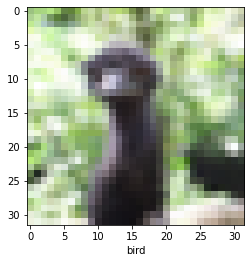

In [14]:
plt.imshow(train_images[55] ,cmap=plt.cm.bone)
plt.xlabel(label_names[train_labels[55][0]])
plt.show()

In [15]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [17]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0431 - accuracy: 0.6356
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0201 - accuracy: 0.6429
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9969 - accuracy: 0.6509
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9744 - accuracy: 0.6586
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9552 - accuracy: 0.6662


In [18]:
from google.colab import files
files.upload()

Saving truck.jfif to truck.jfif


{'truck.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00>CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), default quality\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\x84\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8

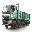

In [19]:
img_path = "truck.jfif"

from keras.preprocessing import image
img = image.load_img(img_path, target_size=(32,32))
img

In [20]:
img = image.img_to_array(img)

In [21]:
img.shape

(32, 32, 3)

In [22]:
img = img.reshape(1,32,32,3)

In [24]:
np.argmax(model.predict(img), axis=-1)

array([9])

In [25]:
import cv2 
import numpy as np

In [26]:
img1 = cv2.imread('truck.jfif')

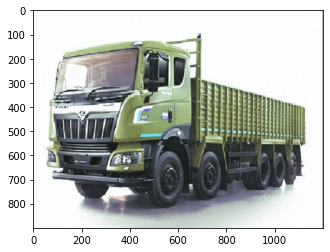

In [27]:
plt.imshow(img1)

In [28]:
img1 = cv2.resize(img1,(32,32))

In [29]:
img1 = np.reshape(img,[1,32,32,3])

In [36]:
value = np.argmax(model.predict(img1))
print(label_names[value])

truck
